In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
data = pd.read_csv("baseball.csv")

In [3]:
data.shape

(30, 17)

In [4]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


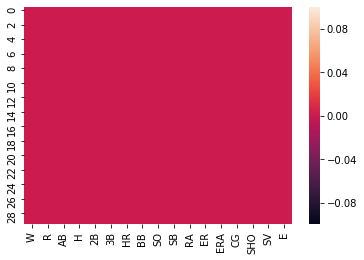

In [6]:
sns.heatmap(data.isnull())

No NULL values in the data

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


W         AxesSubplot(0.125,0.536818;0.0731132x0.343182)
R      AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
AB     AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
H      AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
2B     AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
3B     AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
HR     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
BB     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
SO     AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
SB           AxesSubplot(0.125,0.125;0.0731132x0.343182)
RA        AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ER        AxesSubplot(0.300472,0.125;0.0731132x0.343182)
ERA       AxesSubplot(0.388208,0.125;0.0731132x0.343182)
CG        AxesSubplot(0.475943,0.125;0.0731132x0.343182)
SHO       AxesSubplot(0.563679,0.125;0.0731132x0.343182)
SV        AxesSubplot(0.651415,0.125;0.0731132x0.343182)
E         AxesSubplot(0.739151,0.125;0.0731132x0.343182)
dtype: object

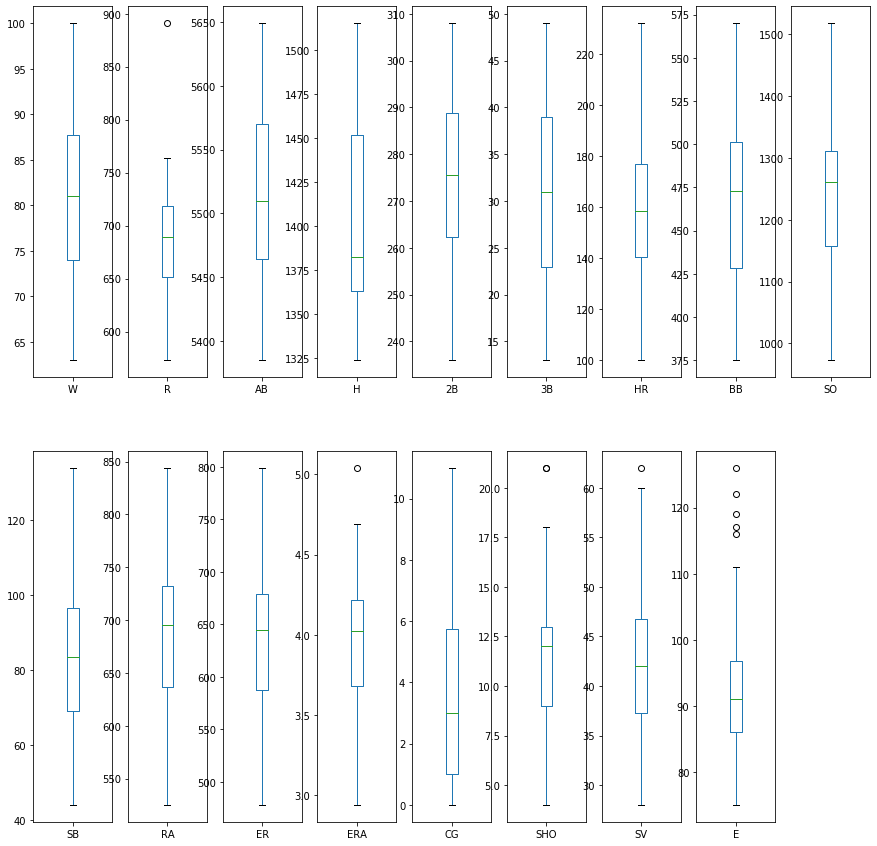

In [8]:
data.plot(kind = 'box', subplots = True, layout = (2,9),figsize = (15,15))

In [9]:
data['zscore'] = (data.R - data.R.mean())/data.R.std()

In [10]:
data = data[data['zscore'] < 3]

In [11]:
data.drop('zscore',axis =1, inplace = True)

data.shape

(29, 17)

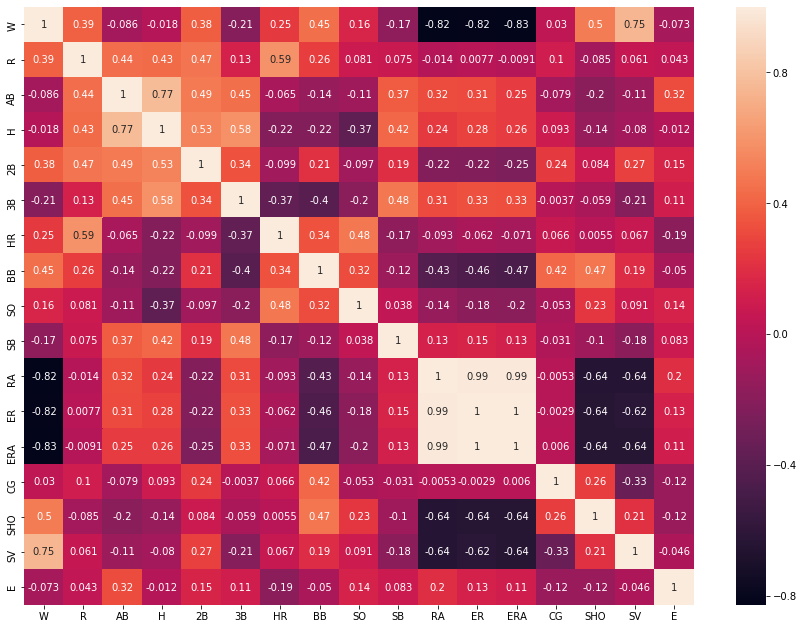

In [12]:
corr_hmap = data.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [13]:
#Highly Corelated columns are dropped
data.drop('RA',axis =1, inplace = True)
data.drop('ERA', axis =1, inplace = True)
data.drop('AB', axis =1, inplace = True)
data.drop('H', axis =1, inplace = True)
data.drop('E', axis =1, inplace = True)
data.shape

(29, 12)

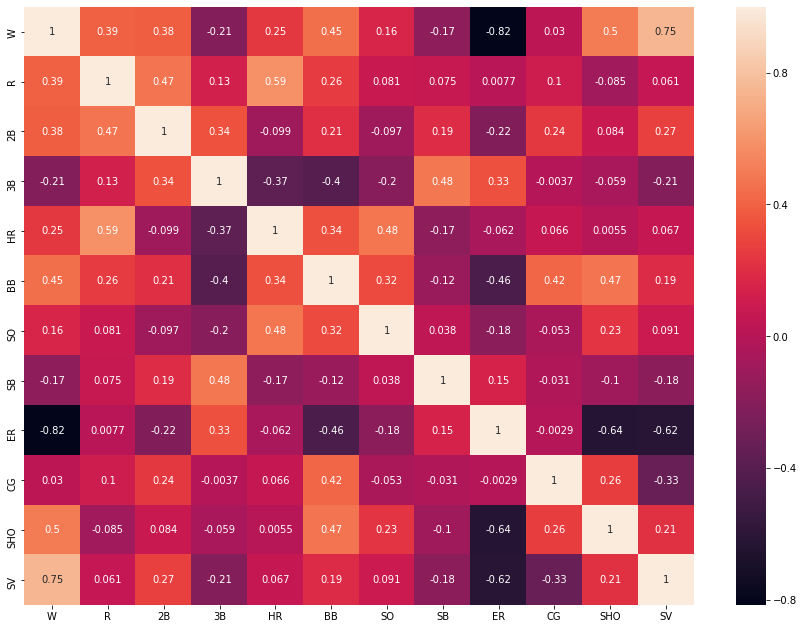

In [14]:
corr_hmap = data.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [15]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy = 'median', axis = 0)
imp = imp.fit(data)
dst = imp.transform(data.values)
data = pd.DataFrame(data = dst)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,95.0,724.0,300.0,42.0,139.0,383.0,973.0,104.0,601.0,2.0,8.0,56.0
1,83.0,696.0,277.0,44.0,156.0,439.0,1264.0,70.0,653.0,2.0,12.0,45.0
2,81.0,669.0,303.0,29.0,141.0,533.0,1157.0,86.0,584.0,11.0,10.0,38.0
3,76.0,622.0,260.0,27.0,136.0,404.0,1231.0,68.0,643.0,7.0,9.0,37.0
4,74.0,689.0,289.0,49.0,151.0,455.0,1259.0,83.0,746.0,7.0,12.0,35.0
5,87.0,764.0,272.0,19.0,212.0,554.0,1227.0,63.0,652.0,3.0,4.0,48.0
6,81.0,713.0,246.0,20.0,217.0,418.0,1331.0,44.0,646.0,3.0,10.0,43.0
7,80.0,644.0,278.0,32.0,167.0,436.0,1310.0,87.0,604.0,1.0,12.0,60.0
8,78.0,748.0,294.0,33.0,161.0,478.0,1148.0,71.0,694.0,3.0,10.0,40.0
9,88.0,751.0,279.0,32.0,172.0,503.0,1233.0,101.0,680.0,5.0,9.0,45.0


In [16]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,636.758621,3.655172,11.344828,43.379310
std,10.384006,45.357040,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,71.195734,2.482451,4.185655,7.816712
min,63.000000,573.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,478.000000,1.000000,4.000000,28.000000
25%,74.000000,650.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,584.000000,2.000000,9.000000,38.000000
50%,81.000000,689.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,646.000000,3.000000,12.000000,43.000000
75%,87.000000,713.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,680.000000,5.000000,13.000000,47.000000
max,100.000000,764.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,799.000000,11.000000,21.000000,62.000000


In [17]:
y = data.iloc[:,0]

In [18]:
y

0      95.0
1      83.0
2      81.0
3      76.0
4      74.0
5      87.0
6      81.0
7      80.0
8      78.0
9      88.0
10     86.0
11     85.0
12     76.0
13     68.0
14    100.0
15     98.0
16     97.0
17     68.0
18     64.0
19     90.0
20     83.0
21     71.0
22     67.0
23     63.0
24     92.0
25     84.0
26     79.0
27     74.0
28     68.0
Name: 0, dtype: float64

In [19]:
y.shape

(29,)

In [20]:
x = data.iloc[:,1:16]

In [21]:
x.shape

(29, 11)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [23]:
x_train.shape

(21, 11)

In [24]:
x_test.shape

(8, 11)

In [25]:
y_train.shape

(21,)

In [26]:
y_test.shape

(8,)

In [27]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9282040916438573

In [28]:
lm.coef_

array([ 0.09896151, -0.05622785, -0.00659701, -0.04146867, -0.00497633,
        0.00576326, -0.03750399, -0.06550903,  0.71550552,  0.2316569 ,
        0.62190014])

In [29]:
lm.intercept_

42.85648107806706

In [30]:
predval = lm.predict(x_test)

In [31]:
predval

array([73.33491274, 94.06321505, 78.12967389, 68.73231963, 78.90512876,
       84.06220325, 70.46932026, 90.13609382])

In [32]:
print('Mean_Squared_Error',mean_squared_error(predval,y_test))

Mean_Squared_Error 7.108524336087244


In [33]:
print('R2_score',r2_score(predval,y_test))

R2_score 0.9025133788339342


In [34]:
lm.score(x_test,y_test)

0.935340313031611